#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. 

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [2]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

$PATH


In [4]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [5]:
# import wget
# url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root'
# download=wget.download(url)
# !mkdir LHCb_Data && mv B2HHH_MagnetDown.root ./LHCb_Data/B2HHH_MagnetDown.root
# If we ALL do this too often, CERN will block our IP address....

In [6]:
#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open ("LHCb_Data/B2HHH_MagnetDown.root")
#From our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [7]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [8]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

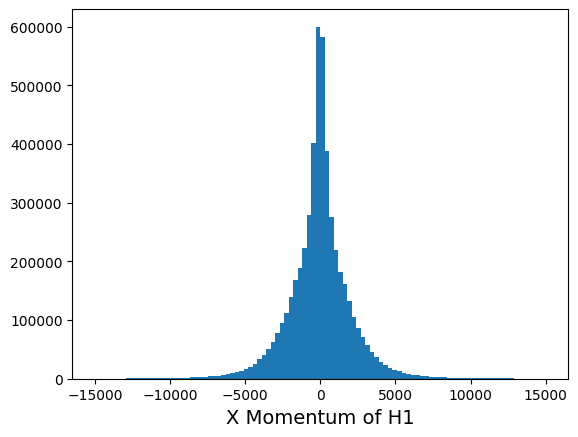

In [9]:
#lets plot something!
import matplotlib.pylab as plt
# make a place to plot something
plt.figure();
plt.hist (data, bins=100, range=(-15000,15000));
plt.xlabel('X Momentum of H1', fontsize=14);


<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

Text(0, 0.5, 'Frequency')

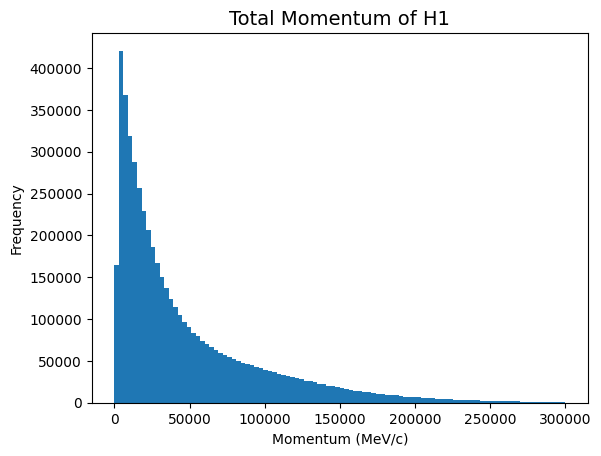

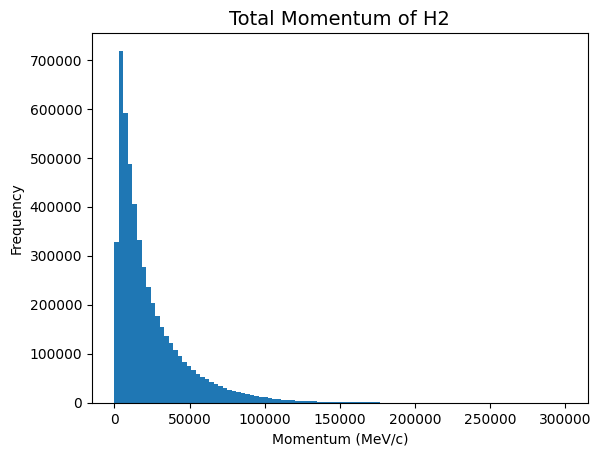

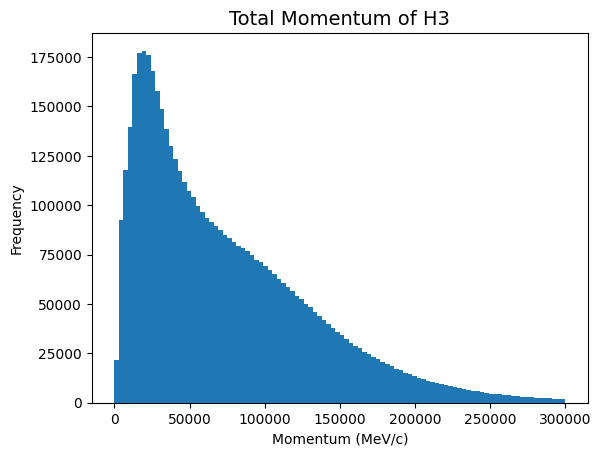

In [11]:
# Get the values from the data for all three daughter particles
Events=f['DecayTree']
H1_PX=Events['H1_PX'].array()
H1_PY=Events['H1_PY'].array()
H1_PZ=Events['H1_PZ'].array()
H1_Charge=Events['H1_Charge'].array()
H1_isMuon=Events['H1_isMuon'].array()

H2_PX=Events['H2_PX'].array()
H2_PY=Events['H2_PY'].array()
H2_PZ=Events['H2_PZ'].array()
H2_Charge=Events['H2_Charge'].array()
H2_isMuon=Events['H2_isMuon'].array()

H3_PX=Events['H3_PX'].array()
H3_PY=Events['H3_PY'].array()
H3_PZ=Events['H3_PZ'].array()
H3_Charge=Events['H3_Charge'].array()
H3_isMuon=Events['H3_isMuon'].array()


# Function for calculating the total momentum of a daughter particle
def H_Ptot(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ):
    H1_Ptot= np.sqrt(H1_PX**2 + H1_PY**2 + H1_PZ**2)
    H2_Ptot= np.sqrt(H2_PX**2 + H2_PY**2 + H2_PZ**2)
    H3_Ptot= np.sqrt(H3_PX**2 + H3_PY**2 + H3_PZ**2)
    return H1_Ptot, H2_Ptot, H3_Ptot

# Calculate the total momentum of the three daughter particles for plotting
H1_Ptot, H2_Ptot, H3_Ptot = H_Ptot(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ)

# Plot the total momenta of the three daughter particles
plt.figure()
plt.hist (H1_Ptot, bins=100, range=(0,300000))
plt.title('Total Momentum of H1', fontsize=14)
plt.xlabel('Momentum (MeV/c)')
plt.ylabel('Frequency')

plt.figure()
plt.hist (H2_Ptot, bins=100, range=(0,300000))
plt.title('Total Momentum of H2', fontsize=14)
plt.xlabel('Momentum (MeV/c)')
plt.ylabel('Frequency')

plt.figure()
plt.hist (H3_Ptot, bins=100, range=(0,300000))
plt.title('Total Momentum of H3', fontsize=14)
plt.xlabel('Momentum (MeV/c)')
plt.ylabel('Frequency')


In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

Text(0, 0.5, 'Frequency')

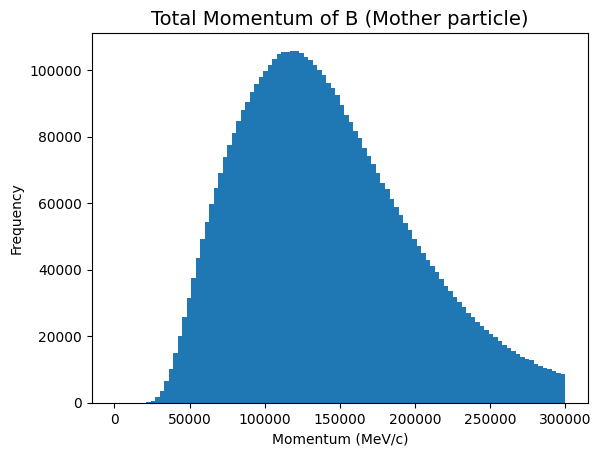

In [12]:
# Function for calculating the total momentum of the mother particle
def Calc_B_Ptot(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ):
    X_Ptot = (H1_PX+ H2_PX + H3_PX)**2
    Y_Ptot = (H1_PY + H2_PY + H3_PY)**2
    Z_Ptot = (H1_PZ + H2_PZ +H3_PZ)**2
    B_Ptot=np.sqrt(X_Ptot + Y_Ptot+ Z_Ptot)
    return B_Ptot

# Calculate the values for the total momenta of the mother particles
B_Ptot = Calc_B_Ptot(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ)

# Plot the total momenta of the mother particles
plt.figure()
plt.hist (B_Ptot, bins=100, range=(0,300000))
plt.title('Total Momentum of B (Mother particle)', fontsize=14)
plt.xlabel('Momentum (MeV/c)')
plt.ylabel('Frequency')

So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [13]:
# Load the data into branches for easy access
branches=Events.arrays()

branches_dictionary=branches.tolist()

event_index = 45

# Print the data from the event 45
print ("Event number #45")
print ("-------------------")
for branch, value in branches_dictionary[event_index].items():
    print("{}  :  {}".format(branch, value))

Event number #45
-------------------
B_FlightDistance  :  257.00205776946603
B_VertexChi2  :  1.865567179221614
H1_PX  :  420.3413896413646
H1_PY  :  -110.66276079201207
H1_PZ  :  5883.766388082404
H1_ProbK  :  0.012183159589767456
H1_ProbPi  :  0.8191394209861755
H1_Charge  :  -1
H1_IPChi2  :  27121.53690741779
H1_isMuon  :  1
H2_PX  :  -985.6367588987478
H2_PY  :  630.9893539299605
H2_PZ  :  35342.13861801284
H2_ProbK  :  0.6670113801956177
H2_ProbPi  :  0.04563945531845093
H2_Charge  :  1
H2_IPChi2  :  13712.438218214942
H2_isMuon  :  0
H3_PX  :  -6242.300384410311
H3_PY  :  -862.2130979651508
H3_PZ  :  277275.49225626234
H3_ProbK  :  0.07501816749572754
H3_ProbPi  :  0.428352952003479
H3_Charge  :  1
H3_IPChi2  :  1026.12298434195
H3_isMuon  :  0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

Text(0, 0.5, 'Frequency')

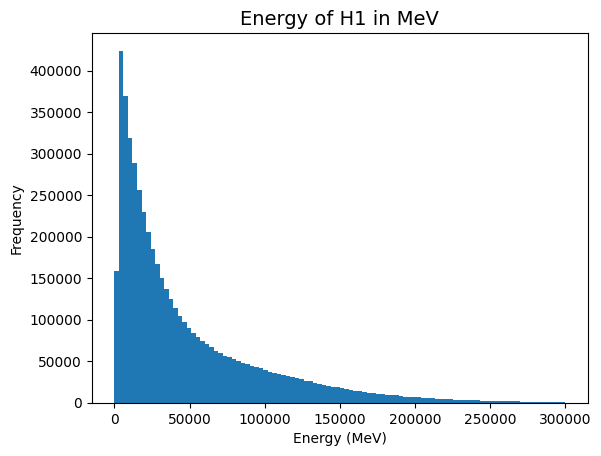

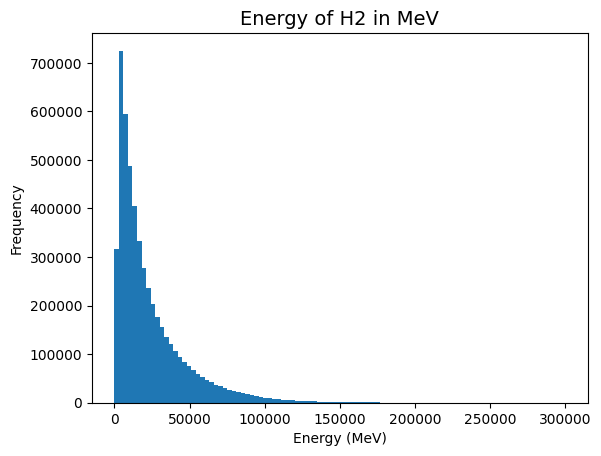

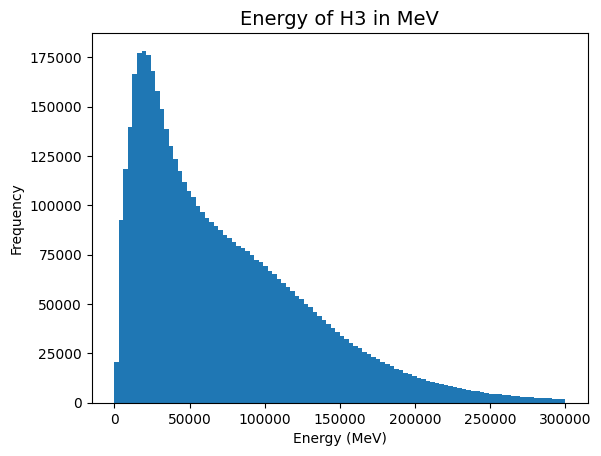

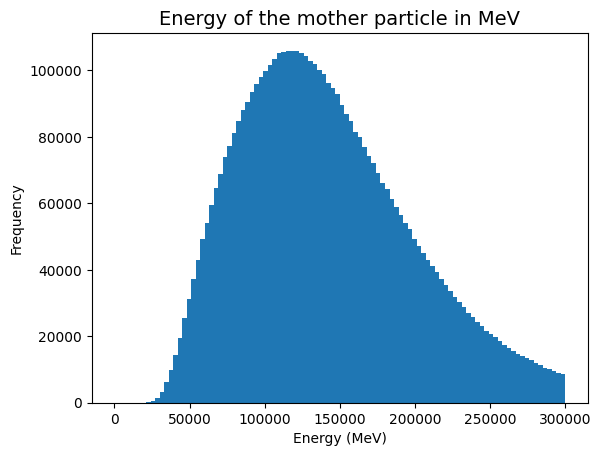

In [16]:
Mass_Kaon = 493.7 # in MeV/c^2

# Function for calculating the total energy of the mother and daughter particles
def B_E_tot(H1_Ptot, H2_Ptot, H3_Ptot, Mass_Kaon):
    H1_E = np.sqrt(H1_Ptot**2  + Mass_Kaon**2)
    H2_E = np.sqrt(H2_Ptot**2 + Mass_Kaon**2)
    H3_E = np.sqrt(H3_Ptot**2 + Mass_Kaon**2)
    E_Tot = H1_E + H2_E + H3_E
    return H1_E, H2_E, H3_E, E_Tot

# Get the values of the energy of the daughter and mother particles
H1_E, H2_E, H3_E, E_Tot = B_E_tot(H1_Ptot, H2_Ptot, H3_Ptot, Mass_Kaon)


# Plot the energies of the daughter and mother particles 
plt.figure()
plt.hist (H1_E, bins=100, range=(0,300000))
plt.title('Energy of H1 in MeV', fontsize=14)
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency')

plt.figure()
plt.hist (H2_E, bins=100, range=(0,300000))
plt.title('Energy of H2 in MeV', fontsize=14)
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency')

plt.figure()
plt.hist (H3_E, bins=100, range=(0,300000))
plt.title('Energy of H3 in MeV', fontsize=14)
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency')

plt.figure()
plt.hist (E_Tot, bins=100, range=(0,300000))
plt.title('Energy of the mother particle in MeV', fontsize=14)
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency')


We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

Text(0, 0.5, 'Frequency')

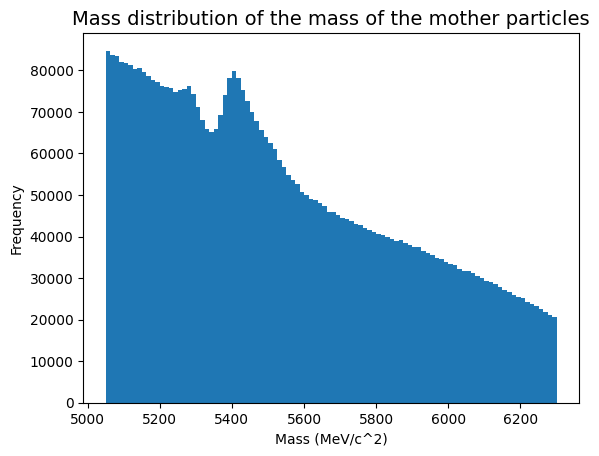

In [17]:
# Function for calculating the mass of the mother particle
def Mass_B(E_Tot, B_Ptot):
    M_B = np.sqrt(E_Tot**2 - B_Ptot**2)
    return M_B

# Calculate the mass of the mother particles
M_B = Mass_B(E_Tot, B_Ptot)

# Plot the mass of the mother particles
plt.figure()
plt.hist (M_B, bins=100)
plt.title('Mass distribution of the mass of the mother particles', fontsize=14)
plt.xlabel("Mass (MeV/c^2)")
plt.ylabel('Frequency')

# As we can see, the mass distribution for all the "mother" particles without filtering,the distribution looks 
# weird without a clear peak and gaussian distibution, this indicates that the datat is unfiltered and does
# not only contain kaons as mother particles



We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

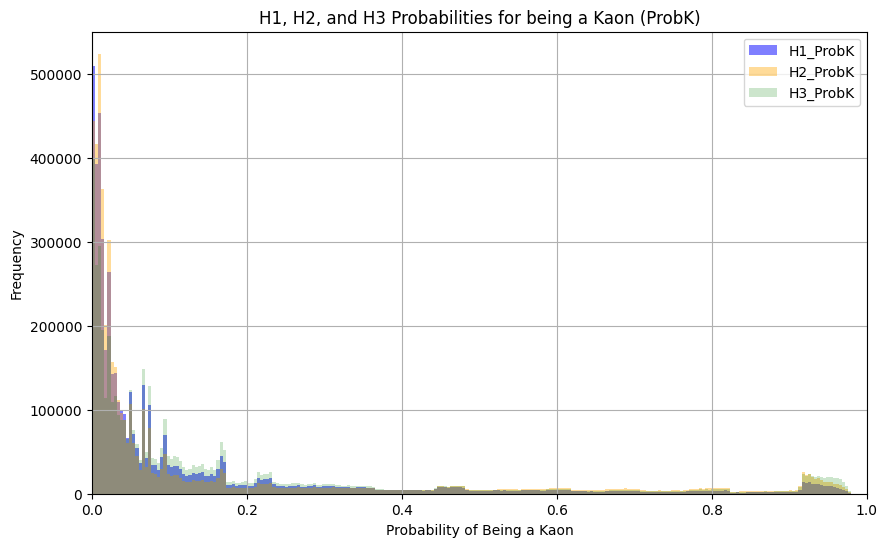

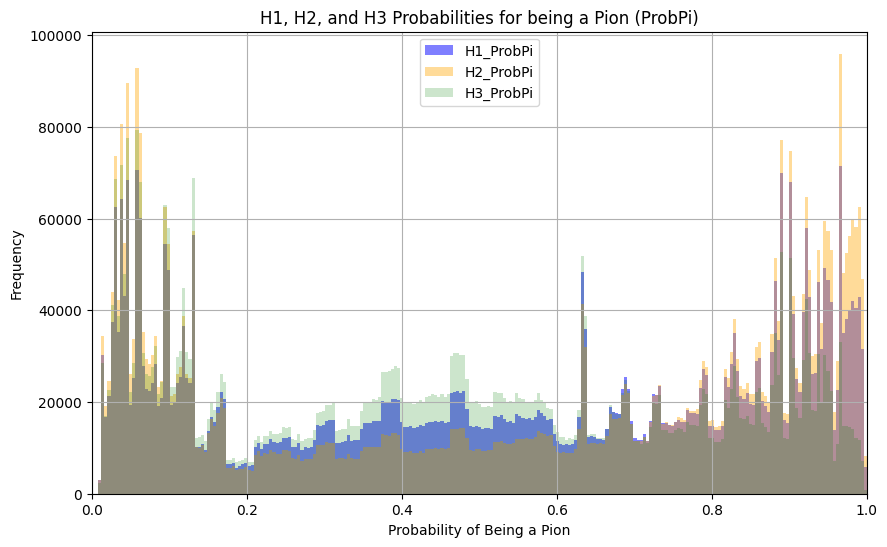

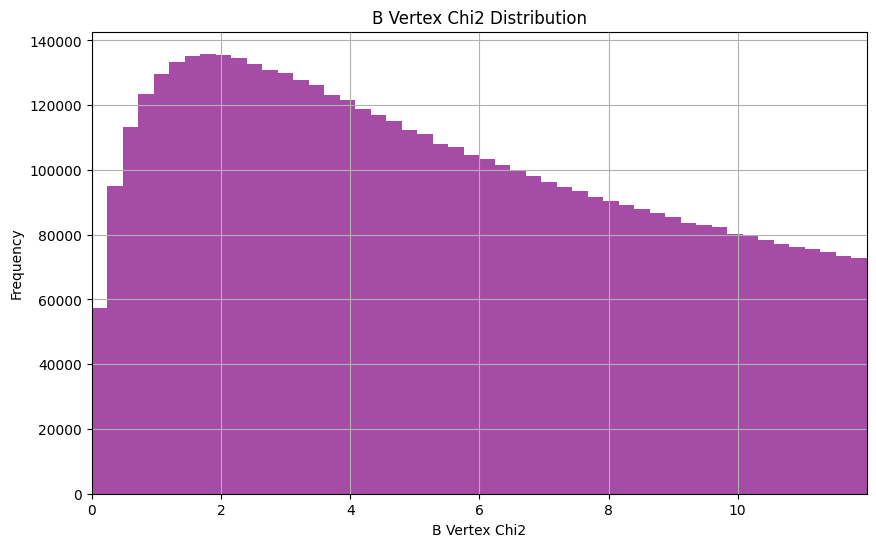

In [18]:

# Get the data required for plotting the probabilies
B_VertexChi2 = Events["B_VertexChi2"].array()
H1_ProbK=Events['H1_ProbK'].array()
H1_ProbPi=Events['H1_ProbPi'].array()
H2_ProbK=Events['H2_ProbK'].array()
H2_ProbPi=Events['H2_ProbPi'].array()
H3_ProbK=Events['H3_ProbK'].array()
H3_ProbPi=Events['H3_ProbPi'].array()

# Plot the probability of the mother particles being a kaon for all daughter particles
plt.figure(figsize=(10, 6))
plt.hist(H1_ProbK, bins=np.linspace(0, 1, 250), alpha=0.5, color='blue', label='H1_ProbK', density=False)
plt.hist(H2_ProbK, bins=np.linspace(0, 1, 250), alpha=0.4, color='orange', label='H2_ProbK', density=False)
plt.hist(H3_ProbK, bins=np.linspace(0, 1, 250), alpha=0.2, color='green', label='H3_ProbK', density=False)
plt.title('H1, H2, and H3 Probabilities for being a Kaon (ProbK)')
plt.xlabel('Probability of Being a Kaon')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0, 1)
plt.legend()
plt.show()

# Plot the probability of the mother particles being a pion for all the daughter particles
plt.figure(figsize=(10, 6))
plt.hist(H1_ProbPi, bins=np.linspace(0, 1, 250), alpha=0.5, color='blue', label='H1_ProbPi', density=False)
plt.hist(H2_ProbPi, bins=np.linspace(0, 1, 250), alpha=0.4, color='orange', label='H2_ProbPi', density=False)
plt.hist(H3_ProbPi, bins=np.linspace(0, 1, 250), alpha=0.2, color='green', label='H3_ProbPi', density=False)
plt.title('H1, H2, and H3 Probabilities for being a Pion (ProbPi)')
plt.xlabel('Probability of Being a Pion')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0, 1)
plt.legend()
plt.show()

# Plot the B vertect Chi 2 distribution
plt.figure(figsize=(10, 6))
plt.hist(B_VertexChi2, bins=50, alpha=0.7, color='purple', density=False)
plt.title('B Vertex Chi2 Distribution')
plt.xlabel('B Vertex Chi2')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0, max(B_VertexChi2)) 
plt.show()



Using these plots, we can now think about making a preselection. This has some format like the below:

In [19]:
# From the plots above we can try and make a selection for determining which daughter particles form kaons
# From the ProbK function we can see that it very good at determinign when it is not a kaon or when it is,
# In the middle the probabilities are almost zero, so we can put our selection on a pretty low treshold
# Let's take the minimum probability of it being a kaon must be higher than 15% so we never use the daughter particles
# that are definitely not from kaons

# The graph of the pion probability shows that the pions probabilities are less well determined, we want definitely not 
# to use the particles that are most definitely a from a pion, so we have to put or treshold pretty low, because even
# in the middle the probabilities are large, let's say that we only select the particles that have a probability of less
# than 40% for being a pion

# As a last test, we will look at each of the daughter particles and see if the probability being from a kaon
# is bigger than the probability of coming from a pion, this way we check even better and especially great for the cases
# where both the probabilies are low

# Lastly, we defnitely want to get rid of all the muon particles, since the system almost knows with 100 percent
# certainty which particles are muons, we can easily filter out all the muon particles, which are labeled 1 for the _isMuon
# variable

selection = (
    (branches['H1_ProbK'] > 0.15) &  
    (branches['H2_ProbK'] > 0.15) &  
    (branches['H3_ProbK'] > 0.15) &  
    (branches['H1_ProbPi'] < 0.40) &  
    (branches['H2_ProbPi'] < 0.40) &  
    (branches['H3_ProbPi'] < 0.40) &  
    (branches['H1_isMuon'] != 1) &    
    (branches['H2_isMuon'] != 1) &    
    (branches['H3_isMuon'] != 1) &    
    (branches['H1_ProbK'] > branches['H1_ProbPi']) &  
    (branches['H2_ProbK'] > branches['H2_ProbPi']) &  
    (branches['H3_ProbK'] > branches['H3_ProbPi'])    
)

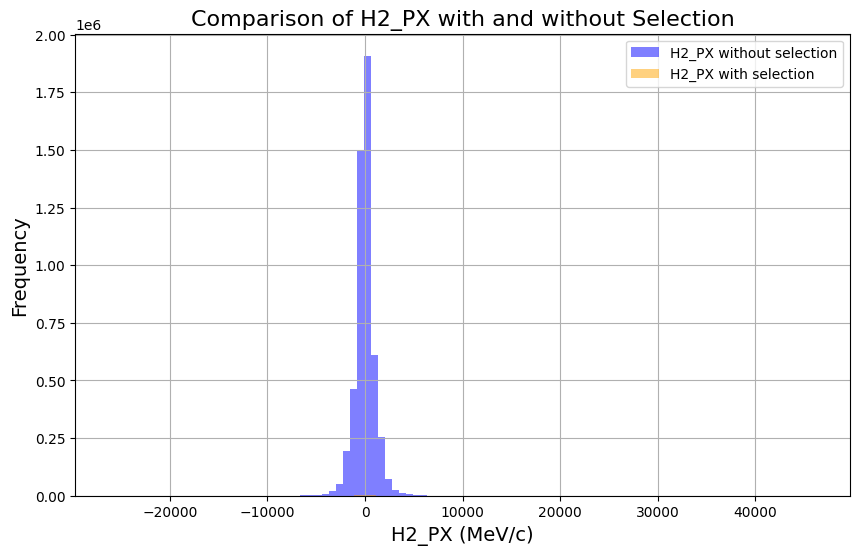

Text(0, 0.5, 'Frequency')

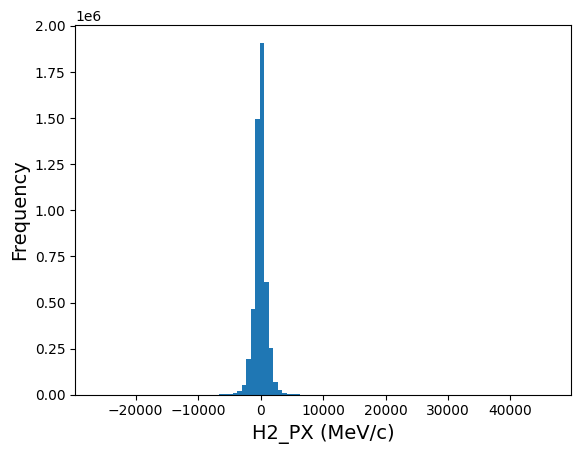

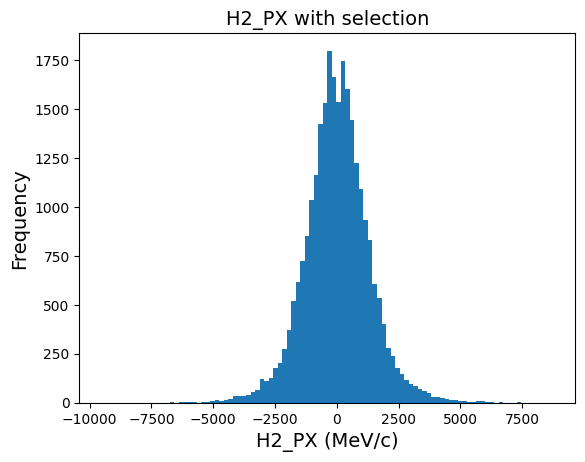

In [20]:
# Apply the selection to the data
def get_cut_data(selection):
    H1_PX_Cut=branches['H1_PX'][selection]
    H2_PX_Cut=branches['H2_PX'][selection]
    H3_PX_Cut=branches['H3_PX'][selection]
    H1_PY_Cut=branches['H1_PY'][selection]
    H2_PY_Cut=branches['H2_PY'][selection]
    H3_PY_Cut=branches['H3_PY'][selection]
    H1_PZ_Cut=branches['H1_PZ'][selection]
    H2_PZ_Cut=branches['H2_PZ'][selection]
    H3_PZ_Cut=branches['H3_PZ'][selection]
    return H1_PX_Cut, H2_PX_Cut, H3_PX_Cut, H1_PY_Cut, H2_PY_Cut, H3_PY_Cut, H1_PZ_Cut, H2_PZ_Cut, H3_PZ_Cut

# Get the cut data for further processing
H1_PX_Cut, H2_PX_Cut, H3_PX_Cut, H1_PY_Cut, H2_PY_Cut, H3_PY_Cut, H1_PZ_Cut, H2_PZ_Cut, H3_PZ_Cut = get_cut_data(selection)


# Plot the uncut data versus the cut data of a random variable to see how strict the selection was
plt.figure(figsize=(10, 6))
plt.hist(H2_PX, bins=100, alpha=0.5, color='blue', label='H2_PX without selection')
plt.hist(H2_PX_Cut, bins=100, alpha=0.5, color='orange', label='H2_PX with selection')
plt.xlabel('H2_PX (MeV/c)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Comparison of H2_PX with and without Selection', fontsize=16)
plt.legend() 
plt.grid(True) 
plt.show()

plt.figure()
plt.hist (H2_PX, bins=100)
plt.xlabel('H2_PX without selection', fontsize=14)
plt.xlabel('H2_PX (MeV/c)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.figure()
plt.hist (H2_PX_Cut, bins=100)
plt.title('H2_PX with selection', fontsize=14)
plt.xlabel('H2_PX (MeV/c)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


Number of entries in the uncut data: 5135823
Number of entries is the cut data: 26518


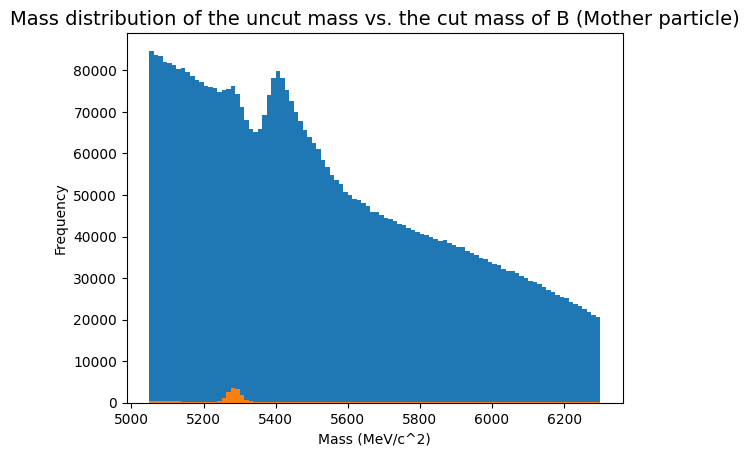

In [ ]:
# As we can see from the previous plots, the data has been cut significantly

# Restating the function for the total momentum of the daughter particles
def H_Ptot(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ):
    H1_Ptot= np.sqrt(H1_PX**2 + H1_PY**2 + H1_PZ**2)
    H2_Ptot= np.sqrt(H2_PX**2 + H2_PY**2 + H2_PZ**2)
    H3_Ptot= np.sqrt(H3_PX**2 + H3_PY**2 + H3_PZ**2)
    return H1_Ptot, H2_Ptot, H3_Ptot

# Restating the function for the total momentum for the mother particle
def Calc_B_Ptot(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ):
    X_Ptot = (H1_PX+ H2_PX + H3_PX)**2
    Y_Ptot = (H1_PY + H2_PY + H3_PY)**2
    Z_Ptot = (H1_PZ + H2_PZ +H3_PZ)**2
    B_Ptot=np.sqrt(X_Ptot + Y_Ptot+ Z_Ptot)
    return B_Ptot

# Restating the function for the total energy of the mother and daughter particles
def B_E_tot(H1_Ptot, H2_Ptot, H3_Ptot, Mass_Kaon):
    H1_E = np.sqrt(H1_Ptot**2  + Mass_Kaon**2)
    H2_E = np.sqrt(H2_Ptot**2 + Mass_Kaon**2)
    H3_E = np.sqrt(H3_Ptot**2 + Mass_Kaon**2)
    E_Tot = H1_E + H2_E + H3_E
    return H1_E, H2_E, H3_E, E_Tot

# Restating the function for the mass of the mother particle
def Mass_B(E_Tot, B_Ptot):
    M_B = np.sqrt(E_Tot**2 - B_Ptot**2)
    return M_B

# Function for the complete logic from the vector momenta of the daughter particles to the mass of the mother particles
def calculate_M_B(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ):
    H1_Ptot, H2_Ptot, H3_Ptot = H_Ptot(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ)
    B_Ptot= Calc_B_Ptot(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ)
    H1_E, H2_E, H3_E, E_Tot = B_E_tot(H1_Ptot, H2_Ptot, H3_Ptot, Mass_Kaon)
    M_B = Mass_B(E_Tot, B_Ptot)
    return M_B

# Calculate the mass of the mother particles for botht he cut and uncut data
M_B_Uncut = calculate_M_B(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ)
M_B_Cut = calculate_M_B(H1_PX_Cut, H2_PX_Cut, H3_PX_Cut, H1_PY_Cut, H2_PY_Cut, H3_PY_Cut, H1_PZ_Cut, H2_PZ_Cut, H3_PZ_Cut)

# Plot the mass of the uncut and cut data for visualising the difference and see if the selection made better results
plt.figure()
plt.hist (M_B_Uncut, bins=100)
plt.hist(M_B_Cut, bins=100)
plt.title('Mass distribution of the uncut mass vs. the cut mass of B (Mother particle)', fontsize=14)
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('Frequency')

# Print the number of entries in both the cut and uncut data
print(f"Number of entries in the uncut data: {len(M_B_Uncut)}")
print(f"Number of entries is the cut data: {len(M_B_Cut)}")


# As we can see, the selection has cut the data from 5 million mother particles to a mere 26 thousand
# From the graph we can see that the cut data has a better gaussian distribution and is close around the theoretical
# value that we would expect for the kaons, which is promising, because it shows that the selection is actually
# mainly keeping the kaons

# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

Fitted parameters for the Gaussian:
A (amplitude) = 1830.23 ± 40.50
μ (mean) = 5284.40 ± 0.49
σ (standard deviation) = 19.34 ± 0.49


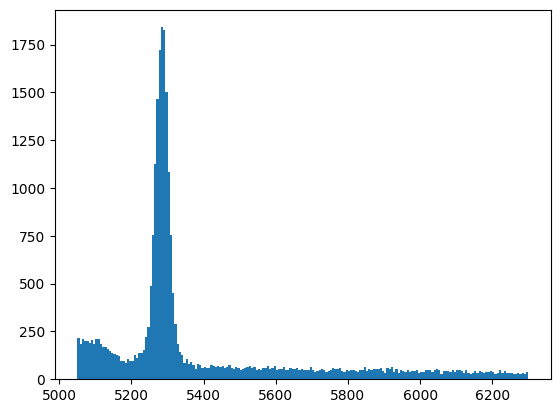

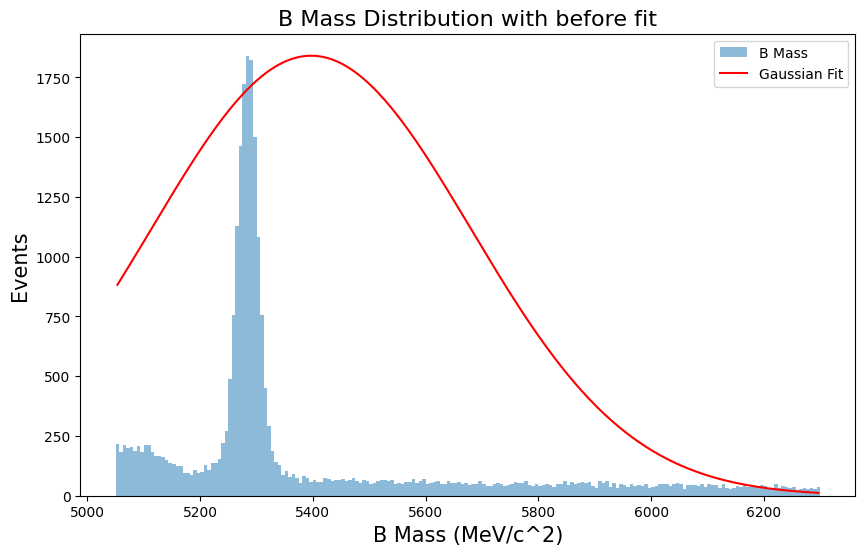

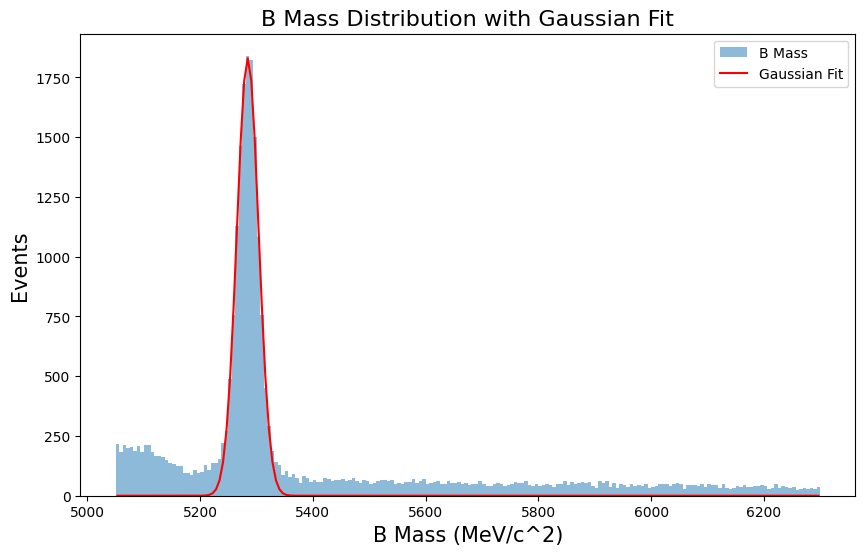

In [22]:
from scipy.optimize import curve_fit

# Redefine the mass of the cut data
B_Mass = M_B_Cut

# Make a plot of the cut mass, so we can get the bin heights and bin edges
bin_height, bin_edge, _=plt.hist(B_Mass, bins=200, range=(min(B_Mass), max(B_Mass)), label = "B Mass")

# For the x values of our data, we want the values from the middle of the bins, so the x- value of the left side of the
# bin plus the x values of the right side of the bin divided by two
x_data = 0.5 * (bin_edge[1:] + bin_edge[:-1])

# For the y values we simply want the height of the bins
y_data = bin_height

# Function for calculating the Gaussian
def gauss (x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# Choose some initial parameters that make sense
initialParameters = [max(y_data), np.mean(B_Mass), np.std(B_Mass)]

# Get the optimised parameters for the data using the curve fit function
optimisedParameters, pcov = curve_fit(gauss, x_data, y_data, p0=initialParameters)

# Get the values of the optimised parameters and the error on them
A, mu, sigma = optimisedParameters
uncertainty_A, uncertainty_mu, uncertainty_sigma = np.sqrt(np.diag(pcov))

# Print the values of the optimised parameters and the error on them
print(f"Fitted parameters for the Gaussian:")
print(f"A (amplitude) = {A:.2f} ± {uncertainty_A:.2f}")
print(f"μ (mean) = {mu:.2f} ± {uncertainty_mu:.2f}")
print(f"σ (standard deviation) = {sigma:.2f} ± {uncertainty_sigma:.2f}")

# Get the values for the gaussian functions with the initial parameters and the optimised parameters
# We do this to see if the model is actually fitting correctly
y_fit = gauss(x_data, *optimisedParameters)
y_fit_before = gauss(x_data, *initialParameters)

# Plot the data with the gaussian of the initial parameters
plt.figure(figsize=(10, 6))
plt.hist(B_Mass, bins=200, range=(min(B_Mass), max(B_Mass)), label="B Mass", alpha=0.5)
plt.plot(x_data, y_fit_before, label='Gaussian Fit', color='red')
plt.xlabel("B Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Events", fontsize=15)
plt.title("B Mass Distribution with before fit", fontsize=16)
plt.legend()
plt.show()

# Plot the data with the gaussian with the optimised parameters
plt.figure(figsize=(10, 6))
plt.hist(B_Mass, bins=200, range=(min(B_Mass), max(B_Mass)), label="B Mass", alpha=0.5)
plt.plot(x_data, y_fit, label='Gaussian Fit', color='red')
plt.xlabel("B Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Events", fontsize=15)
plt.title("B Mass Distribution with Gaussian Fit", fontsize=16)
plt.legend()
plt.show()

Fitted parameters for the exponent (B*exp(-C*x)):
B (amplitude) = 9174523.30 ± 23793883.06
C (exponential decay) = 0.00 ± 0.00


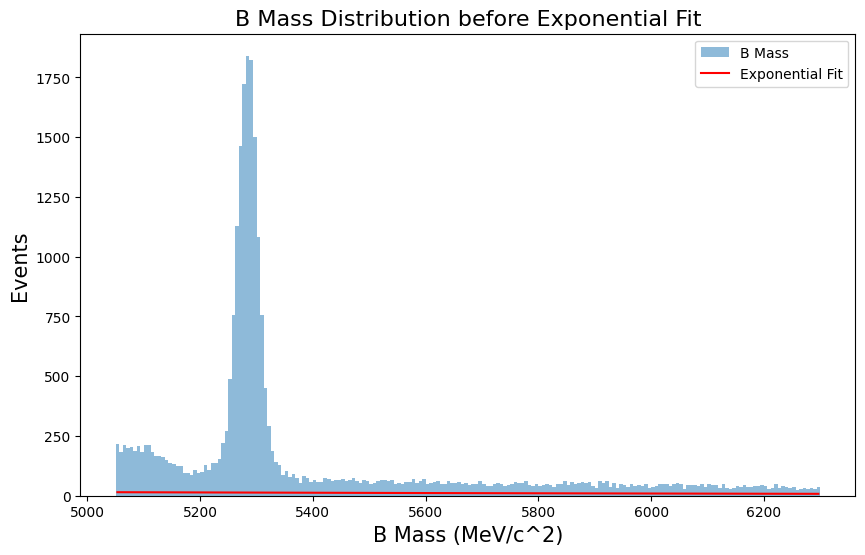

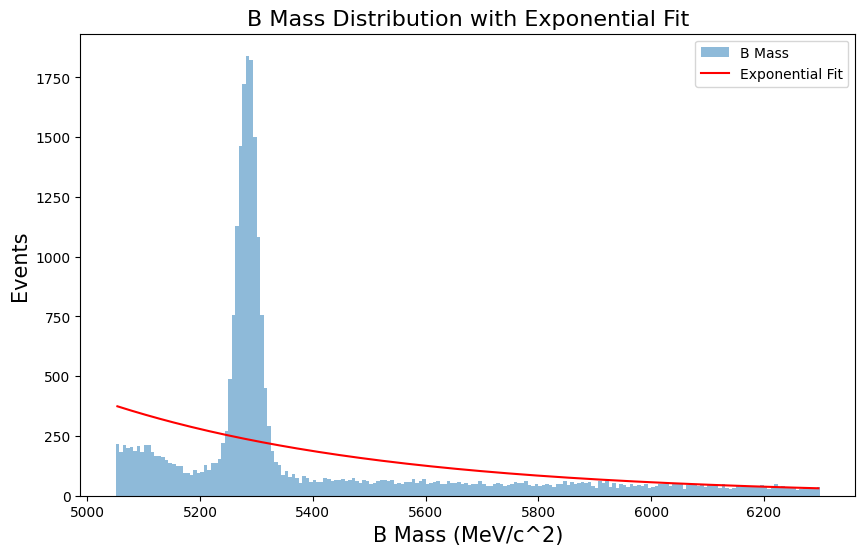

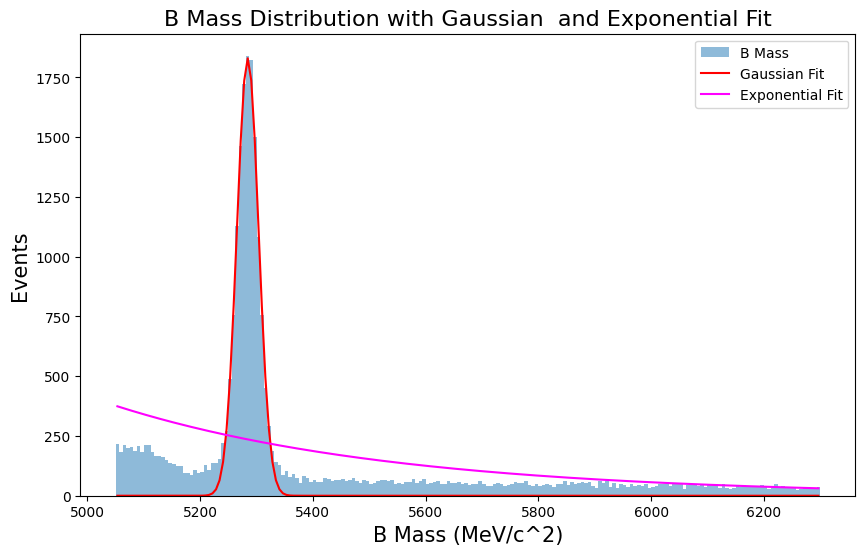

Fitted parameters for the combined parameters:
A (amplitude) = 1756.57 ± 10.72
μ (mean) = 5284.54 ± 0.12
σ (standard deviation) = 17.57 ± 0.13
B (exponential amplitude) = 1552439.67 ± 574844.21
C (exponential decay) = 1.803e-03 ± 6.956e-05


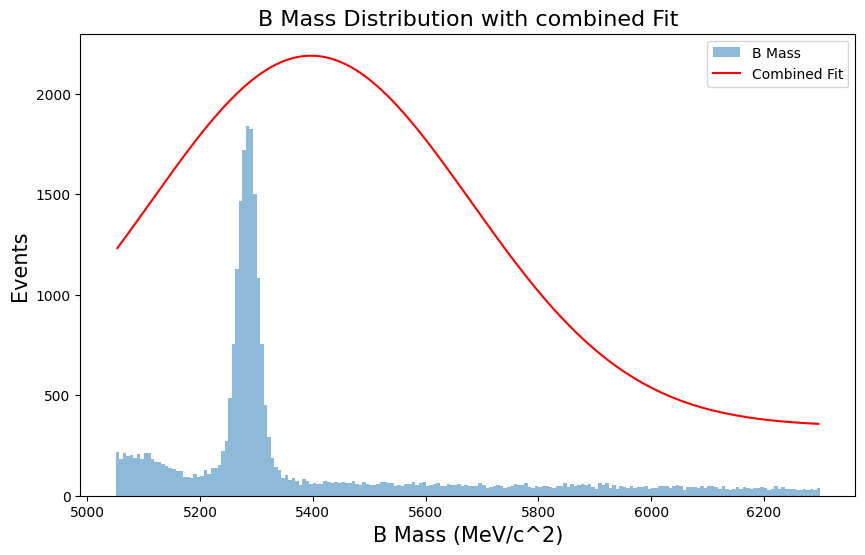

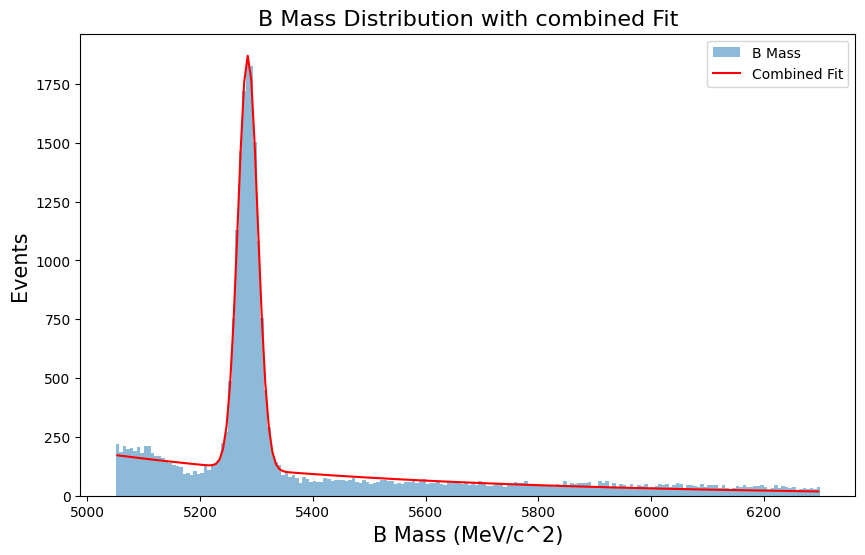

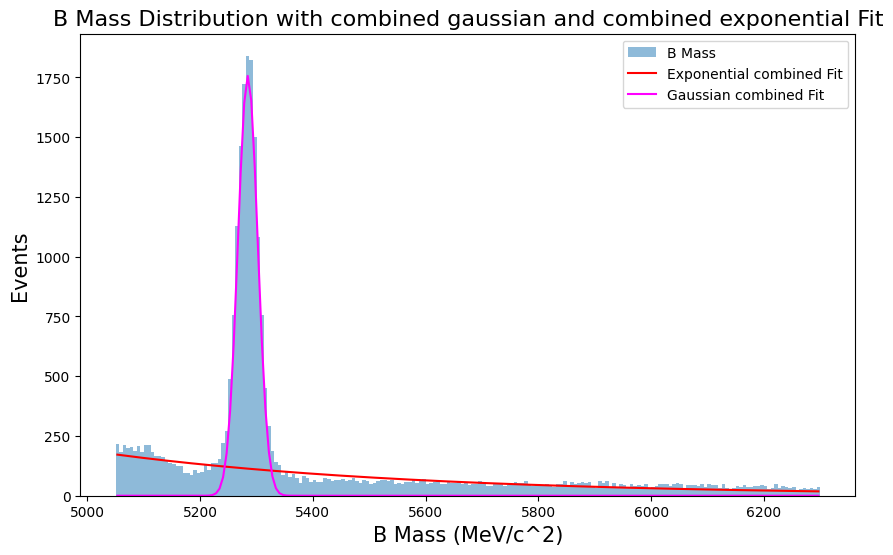

In [23]:
# We also want a exponential function that fits the data well

# Function for the exponential
def exp_background(x, *p):
    B, C = p
    return B * np.exp(-C * x)

# Pick some random initial parameters that are somewhat within the right ballpark
initialParameters_exp = [max(y_data)*0.1, 0.0005] 

# Get the optimised parameters using the curve fit function
optimisedParameters_exp, pcov = curve_fit(exp_background, x_data, y_data, p0=initialParameters_exp)

# Get the valeus for th exponential function for the initial and optimised parameters
# The reason is the same as with the Gaussian, we want to see if it actually does some fitting
y_fit_exp = exp_background(x_data, *optimisedParameters_exp)
y_fit_exp_before = exp_background(x_data, *initialParameters_exp)

# Get the values for the optimised parameters and their errors
B, C = optimisedParameters_exp
uncertainty_B, uncertainty_C = np.sqrt(np.diag(pcov))

# Print the values for the optimised parameters and their errors
print(f"Fitted parameters for the exponent (B*exp(-C*x)):")
print(f"B (amplitude) = {B:.2f} ± {uncertainty_B:.2f}")
print(f"C (exponential decay) = {C:.2f} ± {uncertainty_C:.2f}")

# Plot the data and the exponential fit with the initial parameters
plt.figure(figsize=(10, 6))
plt.hist(B_Mass, bins=200, range=(min(B_Mass), max(B_Mass)), label="B Mass", alpha=0.5)
plt.plot(x_data, y_fit_exp_before, label='Exponential Fit', color='red')
plt.xlabel("B Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Events", fontsize=15)
plt.title("B Mass Distribution before Exponential Fit", fontsize=16)
plt.legend()
plt.show()

# Plot the data and the exponential fit with the optimised parameters
plt.figure(figsize=(10, 6))
plt.hist(B_Mass, bins=200, range=(min(B_Mass), max(B_Mass)), label="B Mass", alpha=0.5)
plt.plot(x_data, y_fit_exp, label='Exponential Fit', color='red')
plt.xlabel("B Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Events", fontsize=15)
plt.title("B Mass Distribution with Exponential Fit", fontsize=16)
plt.legend()
plt.show()

# Plot the data with both the Gaussian and exponential fit for the optimised parameters
plt.figure(figsize=(10, 6))
plt.hist(B_Mass, bins=200, range=(min(B_Mass), max(B_Mass)), label="B Mass", alpha=0.5) 
plt.plot(x_data, y_fit, label='Gaussian Fit', color='red')
plt.plot(x_data, y_fit_exp, label='Exponential Fit', color='magenta')
plt.xlabel("B Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Events", fontsize=15)
plt.title("B Mass Distribution with Gaussian  and Exponential Fit", fontsize=16)
plt.legend()
plt.show()


# The problem now is that the exponential is also fitting for the data in the gaussian but that results in a 
# bad fit for the background data, therefore, we also want the parameters for a combination of the Gaussian
# and the exponential so we get a better fit for the exponential on the background data

# Function for the combination of the Gaussian and the epxponential
def exp_and_gaus(x, A, mu, sigma, B, C):
    return gauss(x, A, mu, sigma) + exp_background(x, B, C)

# Use reasonable initial parameters 
initialParametersCombined = [max(y_data), np.mean(B_Mass), np.std(B_Mass), max(y_data)*0.2, 0.00001]

# Function for getting the parameters and the erros on them
def get_paramaters(initialParametersCombined, x_data, y_data):
    optimisedParametersCombined, pcov = curve_fit(exp_and_gaus, x_data, y_data, p0=initialParametersCombined)
    return optimisedParametersCombined, pcov

# Get the optimised parameters
optimisedParametersCombined, pcov_B =get_paramaters(initialParametersCombined,x_data, y_data)

# Get the values of the combined fit for the initial parameters and optimised parameters, for the same reasons as before
y_fit_combined = exp_and_gaus(x_data, *optimisedParametersCombined)
y_fit_combined_before = exp_and_gaus(x_data, *initialParametersCombined)

# Get the values for the combined parameters and their errors
A, mu, sigma, B, C = optimisedParametersCombined
A_Uncertainty, mu_Uncertainty, sigma_Uncertainty, B_Uncertainty, C_Uncertainty = np.sqrt(np.diag(pcov_B))

# Print the values for the combined parameters and their errors
print("Fitted parameters for the combined parameters:")
print(f"A (amplitude) = {A:.2f} ± {A_Uncertainty:.2f}")
print(f"μ (mean) = {mu:.2f} ± {mu_Uncertainty:.2f}")
print(f"σ (standard deviation) = {sigma:.2f} ± {sigma_Uncertainty:.2f}")
print(f"B (exponential amplitude) = {B:.2f} ± {B_Uncertainty:.2f}")
print(f"C (exponential decay) = {C:.3e} ± {C_Uncertainty:.3e}") 

# Use the optimised parametrs from the combined fit to seperately calculate the exponential and Gaussian fit
y_fit_combined_exp = exp_background(x_data, B, C)
y_fit_combined_gauss = gauss(x_data, A, mu, sigma)

# Plot the data and the combined function of the initial combined parameters
plt.figure(figsize=(10, 6))
plt.hist(B_Mass, bins=200, range=(min(B_Mass), max(B_Mass)), label="B Mass", alpha=0.5) 
plt.plot(x_data, y_fit_combined_before, label='Combined Fit', color='red')
plt.xlabel("B Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Events", fontsize=15)
plt.title("B Mass Distribution with combined Fit", fontsize=16)
plt.legend()
plt.show()

# Plot the data and the combined funtion of the optimised combined parameters
plt.figure(figsize=(10, 6))
plt.hist(B_Mass, bins=200, range=(min(B_Mass), max(B_Mass)), label="B Mass", alpha=0.5) 
plt.plot(x_data, y_fit_combined, label='Combined Fit', color='red')
plt.xlabel("B Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Events", fontsize=15)
plt.title("B Mass Distribution with combined Fit", fontsize=16)
plt.legend()
plt.show()

# Plot the data and the gaussian and the exponential functions with the optimised combined parameters
plt.figure(figsize=(10, 6))
plt.hist(B_Mass, bins=200, range=(min(B_Mass), max(B_Mass)), label="B Mass", alpha=0.5) 
plt.plot(x_data, y_fit_combined_exp, label='Exponential combined Fit', color='red')
plt.plot(x_data, y_fit_combined_gauss, label='Gaussian combined Fit', color='magenta')
plt.xlabel("B Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Events", fontsize=15)
plt.title("B Mass Distribution with combined gaussian and combined exponential Fit", fontsize=16)
plt.legend()
plt.show()

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

# Counting 

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

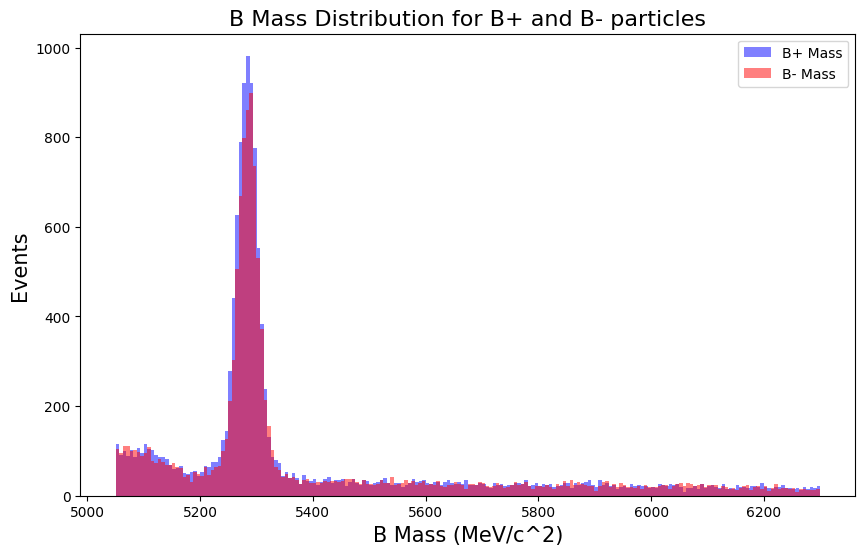

Fitted parameters for B+:
A (amplitude) = 923.30 ± 5.67
μ (mean) = 5283.72 ± 0.13
σ (standard deviation) = 17.83 ± 0.13
B (exponential amplitude) = 765342.44 ± 293789.42
C (exponential decay) = 1.795e-03 ± 7.207e-05

Fitted parameters for B-:
A (amplitude) = 835.66 ± 6.21
μ (mean) = 5285.44 ± 0.15
σ (standard deviation) = 17.20 ± 0.15
B (exponential amplitude) = 791302.73 ± 345512.35
C (exponential decay) = 1.811e-03 ± 8.203e-05


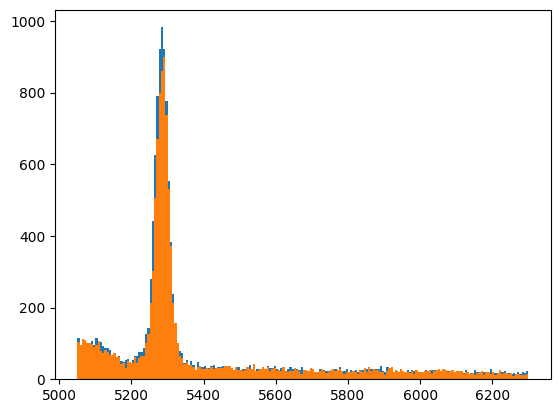

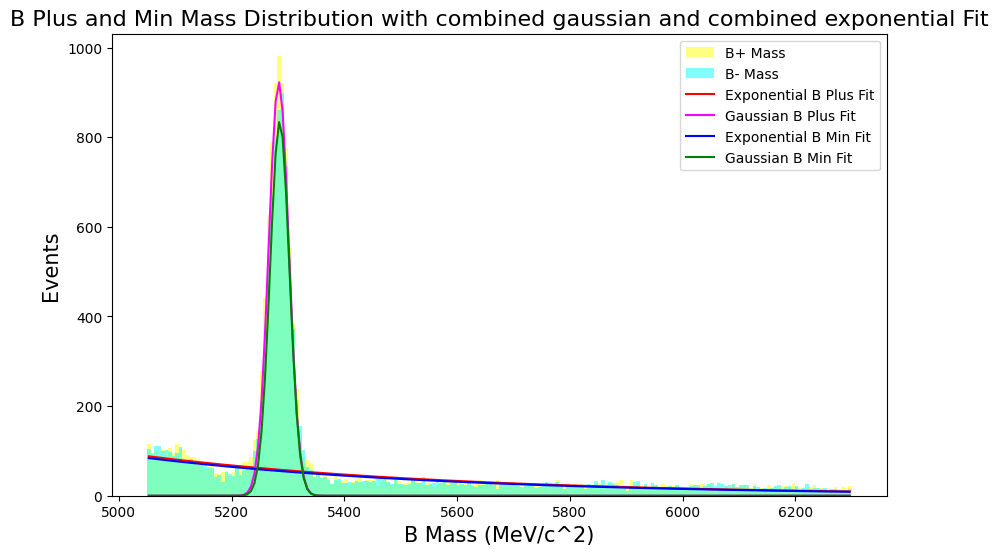

The number of B Plus: 6638.055072196623
The number of B Min: 5798.330028715468
The assymetry between B Plus and B Min is: -0.06752163403331479 with uncertainty: 0.00894665404289269


In [24]:
# We now want to redo the combined fits for the positive and negative kaons to calculate the assymmetry 

# Restate the function for calculating the mass of the mother particle
def calculate_M_B(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ):
    H1_Ptot, H2_Ptot, H3_Ptot = H_Ptot(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ)
    B_Ptot= Calc_B_Ptot(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ)
    H1_E, H2_E, H3_E, E_Tot = B_E_tot(H1_Ptot, H2_Ptot, H3_Ptot, Mass_Kaon)
    M_B = Mass_B(E_Tot, B_Ptot)
    return M_B

# Function for getting the cut data with an arbitrary selection
def get_cut_data(selection):
    H1_PX_Cut=branches['H1_PX'][selection]
    H2_PX_Cut=branches['H2_PX'][selection]
    H3_PX_Cut=branches['H3_PX'][selection]
    H1_PY_Cut=branches['H1_PY'][selection]
    H2_PY_Cut=branches['H2_PY'][selection]
    H3_PY_Cut=branches['H3_PY'][selection]
    H1_PZ_Cut=branches['H1_PZ'][selection]
    H2_PZ_Cut=branches['H2_PZ'][selection]
    H3_PZ_Cut=branches['H3_PZ'][selection]
    return H1_PX_Cut, H2_PX_Cut, H3_PX_Cut, H1_PY_Cut, H2_PY_Cut, H3_PY_Cut, H1_PZ_Cut, H2_PZ_Cut, H3_PZ_Cut

# Add new selection parameters for defining the positive and negative kaons
charge_selection_B_Plus = (H1_Charge + H2_Charge + H3_Charge == 1) & selection
charge_selection_B_Min = (H1_Charge + H2_Charge + H3_Charge == -1) & selection

# Get the cut data for the positive and negative kaons
H1_PX_Cut_Plus, H2_PX_Cut_Plus, H3_PX_Cut_Plus, H1_PY_Cut_Plus, H2_PY_Cut_Plus, H3_PY_Cut_Plus, H1_PZ_Cut_Plus, H2_PZ_Cut_Plus, H3_PZ_Cut_Plus = get_cut_data(charge_selection_B_Plus)
H1_PX_Cut_Min, H2_PX_Cut_Min, H3_PX_Cut_Min, H1_PY_Cut_Min, H2_PY_Cut_Min, H3_PY_Cut_Min, H1_PZ_Cut_Min, H2_PZ_Cut_Min, H3_PZ_Cut_Min = get_cut_data(charge_selection_B_Min)

# Get the masses of the positive and negative kaons
M_B_Plus = calculate_M_B(H1_PX_Cut_Plus, H2_PX_Cut_Plus, H3_PX_Cut_Plus, H1_PY_Cut_Plus, H2_PY_Cut_Plus, H3_PY_Cut_Plus, H1_PZ_Cut_Plus, H2_PZ_Cut_Plus, H3_PZ_Cut_Plus)
M_B_Min = calculate_M_B(H1_PX_Cut_Min, H2_PX_Cut_Min, H3_PX_Cut_Min, H1_PY_Cut_Min, H2_PY_Cut_Min, H3_PY_Cut_Min, H1_PZ_Cut_Min, H2_PZ_Cut_Min, H3_PZ_Cut_Min)


# Plot the masses of the positive and negative kaons seperately but in the same graph
plt.figure(figsize=(10, 6))
plt.hist(M_B_Plus, bins=200, range=(min(M_B_Plus), max(M_B_Plus)), label="B+ Mass", alpha=0.5, color='blue')
plt.hist(M_B_Min, bins=200, range=(min(M_B_Min), max(M_B_Min)), label="B- Mass", alpha=0.5, color='red')  
plt.xlabel("B Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Events", fontsize=15)
plt.title("B Mass Distribution for B+ and B- particles", fontsize=16)
plt.legend()
plt.show()

# Get the bin height and bin edges of the positive and negative kaons
bin_height_Plus, bin_edge_Plus, _=plt.hist(M_B_Plus, bins=200, range=(min(M_B_Plus), max(M_B_Plus)), label = "B PLus Mass")
bin_height_Min, bin_edge_Min, _=plt.hist(M_B_Min, bins=200, range=(min(M_B_Min), max(M_B_Min)), label = "B PLus Mass")

# Get the x and y values for the positive and negative kaons, it is calculatd similarly as before
x_data_Plus = 0.5 * (bin_edge_Plus[1:] + bin_edge_Plus[:-1])
y_data_Plus = bin_height_Plus

x_data_Min = 0.5 * (bin_edge_Min[1:] + bin_edge_Min[:-1])
y_data_Min = bin_height_Min


# Restating the function for getting the parameters
def get_paramaters(initialParametersCombined, x_data, y_data):
    optimisedParametersCombined, pcov = curve_fit(exp_and_gaus, x_data, y_data, p0=initialParametersCombined)
    return optimisedParametersCombined, pcov

# Guesses for the initial parameters of the positive and negative kaons
initialParameters_B_Plus = [max(y_data_Plus), np.mean(M_B_Plus), np.std(M_B_Plus), max(y_data_Plus)*0.2, 0.00001]
initialParameters_B_Min = [max(y_data_Min), np.mean(M_B_Min), np.std(M_B_Min), max(y_data_Min)*0.2, 0.00001]

# Get the optimised parameters for the positive and negative kaons
optimisedParameters_B_Plus, pcov_B_Plus = get_paramaters(initialParameters_B_Plus, x_data_Plus, y_data_Plus)
optimisedParameters_B_Min, pcov_B_Min = get_paramaters(initialParameters_B_Min, x_data_Min, y_data_Min)

# Get the values of the  combined optimised parameters of the positive and negative kaons
A_Plus, mu_Plus, sigma_Plus, B_Plus, C_Plus = optimisedParameters_B_Plus
A_Plus_Uncertainty, mu_Plus_Uncertainty, sigma_Plus_Uncertainty, B_Plus_Uncertainty, C_Plus_Uncertainty = np.sqrt(np.diag(pcov_B_Plus))

A_Min, mu_Min, sigma_Min, B_Min, C_Min = optimisedParameters_B_Min
A_Min_Uncertainty, mu_Min_Uncertainty, sigma_Min_Uncertainty, B_Min_Uncertainty, C_Min_Uncertainty = np.sqrt(np.diag(pcov_B_Min))

# Print the values of the  combined optimised parameters of the positive and negative kaons
print("Fitted parameters for B+:")
print(f"A (amplitude) = {A_Plus:.2f} ± {A_Plus_Uncertainty:.2f}")
print(f"μ (mean) = {mu_Plus:.2f} ± {mu_Plus_Uncertainty:.2f}")
print(f"σ (standard deviation) = {sigma_Plus:.2f} ± {sigma_Plus_Uncertainty:.2f}")
print(f"B (exponential amplitude) = {B_Plus:.2f} ± {B_Plus_Uncertainty:.2f}")
print(f"C (exponential decay) = {C_Plus:.3e} ± {C_Plus_Uncertainty:.3e}") 

print("\nFitted parameters for B-:")
print(f"A (amplitude) = {A_Min:.2f} ± {A_Min_Uncertainty:.2f}")
print(f"μ (mean) = {mu_Min:.2f} ± {mu_Min_Uncertainty:.2f}")
print(f"σ (standard deviation) = {sigma_Min:.2f} ± {sigma_Min_Uncertainty:.2f}")
print(f"B (exponential amplitude) = {B_Min:.2f} ± {B_Min_Uncertainty:.2f}")
print(f"C (exponential decay) = {C_Min:.3e} ± {C_Min_Uncertainty:.3e}") 


# Get the values for the exponential and Gaussian fits for the combined optimised parameters for the positive and negative kaons
y_fit_exp_B_Plus = exp_background(x_data_Plus, B_Plus, C_Plus)
y_fit_gauss_B_Plus = gauss(x_data_Plus, A_Plus, mu_Plus, sigma_Plus)

y_fit_exp_B_Min = exp_background(x_data_Min, B_Min, C_Min)
y_fit_gauss_B_Min = gauss(x_data_Min, A_Min, mu_Min, sigma_Min)

# Plot the exponential and Gaussian fits for the combined optimised parameters for the positive and negative kaons
plt.figure(figsize=(10, 6))
plt.hist(M_B_Plus, bins=200, range=(min(M_B_Plus), max(M_B_Plus)), label="B+ Mass", alpha=0.5, color='yellow')
plt.hist(M_B_Min, bins=200, range=(min(M_B_Min), max(M_B_Min)), label="B- Mass", alpha=0.5, color='cyan') 
plt.plot(x_data_Plus, y_fit_exp_B_Plus, label='Exponential B Plus Fit', color='red')
plt.plot(x_data_Plus, y_fit_gauss_B_Plus, label='Gaussian B Plus Fit', color='magenta')
plt.plot(x_data_Min, y_fit_exp_B_Min, label='Exponential B Min Fit', color='blue')
plt.plot(x_data_Min, y_fit_gauss_B_Min, label='Gaussian B Min Fit', color='green')
plt.xlabel("B Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Events", fontsize=15)
plt.title("B Plus and Min Mass Distribution with combined gaussian and combined exponential Fit", fontsize=16)
plt.legend()
plt.show()

# Calculat the area under the Gaussian curves or the psitive and negative kaons, which are the number of kaons
# which will be used the calculate the assymetry
area_gauss_Plus = (A_Plus*sigma_Plus*np.sqrt(2* np.pi))/(max(x_data_Plus)-min(x_data_Plus))*200
area_gauss_Min = A_Min*sigma_Min*np.sqrt(2*np.pi)/(max(x_data_Min)-min(x_data_Min))*200

# print the number of positive and negative kaons under the Gaussian curve
print(f'The number of B Plus: {area_gauss_Plus}')
print(f'The number of B Min: {area_gauss_Min}')

# Calculate the assymetry and the error on the assymetry
assymetry = (area_gauss_Min-area_gauss_Plus)/(area_gauss_Min+area_gauss_Plus)
uncertainty_assymetry = np.sqrt(((1-assymetry**2)/(area_gauss_Min+area_gauss_Plus)))

# print the assymetry and the error on the assymetry
print(f"The assymetry between B Plus and B Min is: {assymetry} with uncertainty: {uncertainty_assymetry}")

Fitted parameters for B+ up:
A (amplitude) = 678.70 ± 4.48
μ (mean) = 5285.66 ± 0.13
σ (standard deviation) = 16.75 ± 0.13
B (exponential amplitude) = 675493.54 ± 307490.14
C (exponential decay) = 1.851e-03 ± 8.562e-05

Fitted parameters for B- up:
A (amplitude) = 600.49 ± 4.44
μ (mean) = 5284.25 ± 0.15
σ (standard deviation) = 17.18 ± 0.15
B (exponential amplitude) = 4760679.87 ± 2476724.02
C (exponential decay) = 2.222e-03 ± 9.871e-05


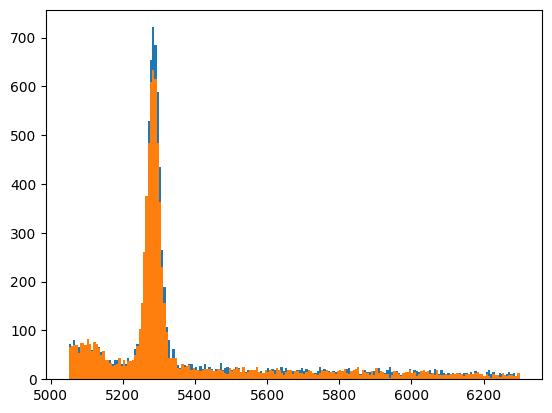

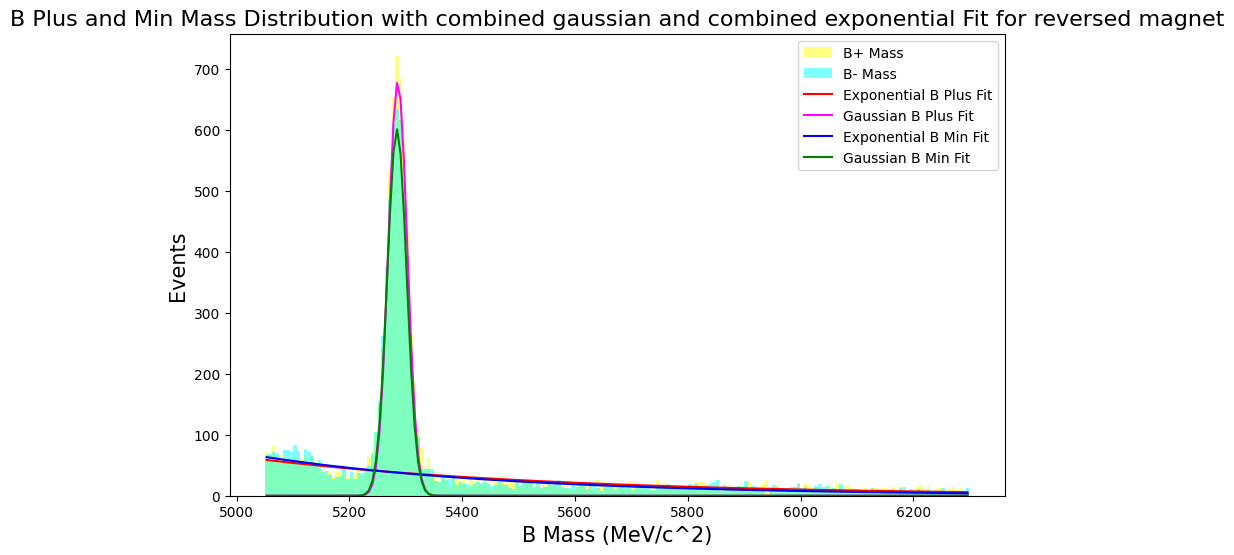

The number of B Plus (up): 4584.69532345946
The number of B Min (up): 4159.336926597954
The assymetry (reversed magnet) between B Plus and B Min is: -0.04864556587822668 with uncertainty: 0.010681436435867163
So the reversed magnets compared:
assymmetry: -0.06752163403331479 --- -0.04864556587822668
Uncertainty: 0.00894665404289269 --- 0.010681436435867163 


In [ ]:
# Now let's do the whole thing again for the reversed magnet, to see if there is actually an assymetry or a fault 
# in the detector equipment

import uproot, awkward, numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

f_Up = uproot.open ("LHCb_Data/B2HHH_MagnetUp.root")
f_Up.keys()

Mass_Kaon = 493.7 # MeV/c^2

Events_Up=f_Up['DecayTree']
branches_up=Events_Up.arrays()

H1_Charge_Up = Events_Up['H1_Charge'].array()
H2_Charge_Up = Events_Up['H2_Charge'].array()
H3_Charge_Up = Events_Up['H3_Charge'].array()

selection_Up = (
    (branches_up['H1_ProbK'] > 0.15) &  
    (branches_up['H2_ProbK'] > 0.15) &  
    (branches_up['H3_ProbK'] > 0.15) &  
    (branches_up['H1_ProbPi'] < 0.40) &  
    (branches_up['H2_ProbPi'] < 0.40) &  
    (branches_up['H3_ProbPi'] < 0.40) &  
    (branches_up['H1_isMuon'] != 1) &    
    (branches_up['H2_isMuon'] != 1) &    
    (branches_up['H3_isMuon'] != 1) &    
    (branches_up['H1_ProbK'] > branches_up['H1_ProbPi']) &  
    (branches_up['H2_ProbK'] > branches_up['H2_ProbPi']) &  
    (branches_up['H3_ProbK'] > branches_up['H3_ProbPi'])    
)


def get_cut_data_up(selection_up):
    H1_PX_Cut_up=branches_up['H1_PX'][selection_up]
    H2_PX_Cut_up=branches_up['H2_PX'][selection_up]
    H3_PX_Cut_up=branches_up['H3_PX'][selection_up]
    H1_PY_Cut_up=branches_up['H1_PY'][selection_up]
    H2_PY_Cut_up=branches_up['H2_PY'][selection_up]
    H3_PY_Cut_up=branches_up['H3_PY'][selection_up]
    H1_PZ_Cut_up=branches_up['H1_PZ'][selection_up]
    H2_PZ_Cut_up=branches_up['H2_PZ'][selection_up]
    H3_PZ_Cut_up=branches_up['H3_PZ'][selection_up]
    return H1_PX_Cut_up, H2_PX_Cut_up, H3_PX_Cut_up, H1_PY_Cut_up, H2_PY_Cut_up, H3_PY_Cut_up, H1_PZ_Cut_up, H2_PZ_Cut_up, H3_PZ_Cut_up


def H_Ptot_up(H1_PX_up, H2_PX_up, H3_PX_up, H1_PY_up, H2_PY_up, H3_PY_up, H1_PZ_up, H2_PZ_up, H3_PZ_up):
    H1_Ptot_up= np.sqrt(H1_PX_up**2 + H1_PY_up**2 + H1_PZ_up**2)
    H2_Ptot_up= np.sqrt(H2_PX_up**2 + H2_PY_up**2 + H2_PZ_up**2)
    H3_Ptot_up= np.sqrt(H3_PX_up**2 + H3_PY_up**2 + H3_PZ_up**2)
    return H1_Ptot_up, H2_Ptot_up, H3_Ptot_up

def Calc_B_Ptot_up(H1_PX_up, H2_PX_up, H3_PX_up, H1_PY_up, H2_PY_up, H3_PY_up, H1_PZ_up, H2_PZ_up, H3_PZ_up):
    X_Ptot_up = (H1_PX_up+ H2_PX_up + H3_PX_up)**2
    Y_Ptot_up = (H1_PY_up + H2_PY_up + H3_PY_up)**2
    Z_Ptot_up = (H1_PZ_up + H2_PZ_up +H3_PZ_up)**2
    B_Ptot_up=np.sqrt(X_Ptot_up + Y_Ptot_up+ Z_Ptot_up)
    return B_Ptot_up

def B_E_tot_up(H1_Ptot_up, H2_Ptot_up, H3_Ptot_up, Mass_Kaon):
    H1_E_up = np.sqrt(H1_Ptot_up**2  + Mass_Kaon**2)
    H2_E_up = np.sqrt(H2_Ptot_up**2 + Mass_Kaon**2)
    H3_E_up = np.sqrt(H3_Ptot_up**2 + Mass_Kaon**2)
    E_Tot_up = H1_E_up + H2_E_up + H3_E_up
    return H1_E_up, H2_E_up, H3_E_up, E_Tot_up

def Mass_B_up(E_Tot_up, B_Ptot_up):
    M_B_up = np.sqrt(E_Tot_up**2 - B_Ptot_up**2)
    return M_B_up


def calculate_M_B_up(H1_PX_up, H2_PX_up, H3_PX_up, H1_PY_up, H2_PY_up, H3_PY_up, H1_PZ_up, H2_PZ_up, H3_PZ_up):
    H1_Ptot_up, H2_Ptot_up, H3_Ptot_up = H_Ptot_up(H1_PX_up, H2_PX_up, H3_PX_up, H1_PY_up, H2_PY_up, H3_PY_up, H1_PZ_up, H2_PZ_up, H3_PZ_up)
    B_Ptot_up= Calc_B_Ptot_up(H1_PX_up, H2_PX_up, H3_PX_up, H1_PY_up, H2_PY_up, H3_PY_up, H1_PZ_up, H2_PZ_up, H3_PZ_up)
    H1_E_up, H2_E_up, H3_E_up, E_Tot_up = B_E_tot_up(H1_Ptot_up, H2_Ptot_up, H3_Ptot_up, Mass_Kaon)
    M_B_up = Mass_B_up(E_Tot_up, B_Ptot_up)
    return M_B_up


charge_selection_B_Plus_Up = (H1_Charge_Up + H2_Charge_Up + H3_Charge_Up == 1) & selection_Up
charge_selection_B_Min_Up = (H1_Charge_Up + H2_Charge_Up + H3_Charge_Up == -1) & selection_Up

H1_PX_Up_Plus, H2_PX_Up_Plus, H3_PX_Up_Plus, H1_PY_Up_Plus, H2_PY_Up_Plus, H3_PY_Up_Plus, H1_PZ_Up_Plus, H2_PZ_Up_Plus, H3_PZ_Up_Plus = get_cut_data_up(charge_selection_B_Plus_Up)
H1_PX_Up_Min, H2_PX_Up_Min, H3_PX_Up_Min, H1_PY_Up_Min, H2_PY_Up_Min, H3_PY_Up_Min, H1_PZ_Up_Min, H2_PZ_Up_Min, H3_PZ_Up_Min = get_cut_data_up(charge_selection_B_Min_Up)

M_B_Plus_Up = calculate_M_B_up(H1_PX_Up_Plus, H2_PX_Up_Plus, H3_PX_Up_Plus, H1_PY_Up_Plus, H2_PY_Up_Plus, H3_PY_Up_Plus, H1_PZ_Up_Plus, H2_PZ_Up_Plus, H3_PZ_Up_Plus)
M_B_Min_Up = calculate_M_B_up(H1_PX_Up_Min, H2_PX_Up_Min, H3_PX_Up_Min, H1_PY_Up_Min, H2_PY_Up_Min, H3_PY_Up_Min, H1_PZ_Up_Min, H2_PZ_Up_Min, H3_PZ_Up_Min)


bin_height_Plus_Up, bin_edge_Plus_Up, _=plt.hist(M_B_Plus_Up, bins=200, range=(min(M_B_Plus_Up), max(M_B_Plus_Up)), label = "B PLus Mass Up")
bin_height_Min_Up, bin_edge_Min_Up, _=plt.hist(M_B_Min_Up, bins=200, range=(min(M_B_Min_Up), max(M_B_Min_Up)), label = "B PLus Mass Up")


x_data_Plus_up = 0.5 * (bin_edge_Plus_Up[1:] + bin_edge_Plus_Up[:-1])
y_data_Plus_up = bin_height_Plus_Up

x_data_Min_up = 0.5 * (bin_edge_Min_Up[1:] + bin_edge_Min_Up[:-1])
y_data_Min_up = bin_height_Min_Up

def get_paramaters(initialParametersCombined, x_data, y_data):
    optimisedParametersCombined, pcov = curve_fit(exp_and_gaus, x_data, y_data, p0=initialParametersCombined)
    return optimisedParametersCombined, pcov

def gauss (x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

def exp_background(x, *p):
    B, C = p
    return B * np.exp(-C * x)

def exp_and_gaus(x, A, mu, sigma, B, C):
    return gauss(x, A, mu, sigma) + exp_background(x, B, C)

initialParameters_B_Plus_up = [max(y_data_Plus_up), np.mean(M_B_Plus_Up), np.std(M_B_Plus_Up), max(y_data_Plus_up)*0.2, 0.00001]
initialParameters_B_Min_up = [max(y_data_Min_up), np.mean(M_B_Min_Up), np.std(M_B_Min_Up), max(y_data_Min_up)*0.2, 0.00001]

optimisedParameters_B_Plus_up, pcov_B_Plus_up = get_paramaters(initialParameters_B_Plus_up, x_data_Plus_up, y_data_Plus_up)
optimisedParameters_B_Min_up, pcov_B_Min_up = get_paramaters(initialParameters_B_Min_up, x_data_Min_up, y_data_Min_up)


A_Plus_up, mu_Plus_up, sigma_Plus_up, B_Plus_up, C_Plus_up = optimisedParameters_B_Plus_up
A_Plus_Uncertainty_up, mu_Plus_Uncertainty_up, sigma_Plus_Uncertainty_up, B_Plus_Uncertainty_up, C_Plus_Uncertainty_up = np.sqrt(np.diag(pcov_B_Plus_up))

A_Min_up, mu_Min_up, sigma_Min_up, B_Min_up, C_Min_up = optimisedParameters_B_Min_up
A_Min_Uncertainty_up, mu_Min_Uncertainty_up, sigma_Min_Uncertainty_up, B_Min_Uncertainty_up, C_Min_Uncertainty_up = np.sqrt(np.diag(pcov_B_Min_up))


print("Fitted parameters for B+ up:")
print(f"A (amplitude) = {A_Plus_up:.2f} ± {A_Plus_Uncertainty_up:.2f}")
print(f"μ (mean) = {mu_Plus_up:.2f} ± {mu_Plus_Uncertainty_up:.2f}")
print(f"σ (standard deviation) = {sigma_Plus_up:.2f} ± {sigma_Plus_Uncertainty_up:.2f}")
print(f"B (exponential amplitude) = {B_Plus_up:.2f} ± {B_Plus_Uncertainty_up:.2f}")
print(f"C (exponential decay) = {C_Plus_up:.3e} ± {C_Plus_Uncertainty_up:.3e}") 

print("\nFitted parameters for B- up:")
print(f"A (amplitude) = {A_Min_up:.2f} ± {A_Min_Uncertainty_up:.2f}")
print(f"μ (mean) = {mu_Min_up:.2f} ± {mu_Min_Uncertainty_up:.2f}")
print(f"σ (standard deviation) = {sigma_Min_up:.2f} ± {sigma_Min_Uncertainty_up:.2f}")
print(f"B (exponential amplitude) = {B_Min_up:.2f} ± {B_Min_Uncertainty_up:.2f}")
print(f"C (exponential decay) = {C_Min_up:.3e} ± {C_Min_Uncertainty_up:.3e}") 


y_fit_exp_B_Plus_up = exp_background(x_data_Plus_up, B_Plus_up, C_Plus_up)
y_fit_gauss_B_Plus_up = gauss(x_data_Plus_up, A_Plus_up, mu_Plus_up, sigma_Plus_up)

y_fit_exp_B_Min_up = exp_background(x_data_Min_up, B_Min_up, C_Min_up)
y_fit_gauss_B_Min_up = gauss(x_data_Min_up, A_Min_up, mu_Min_up, sigma_Min_up)

plt.figure(figsize=(10, 6))
plt.hist(M_B_Plus_Up, bins=200, range=(min(M_B_Plus_Up), max(M_B_Plus_Up)), label="B+ Mass", alpha=0.5, color='yellow')
plt.hist(M_B_Min_Up, bins=200, range=(min(M_B_Min_Up), max(M_B_Min_Up)), label="B- Mass", alpha=0.5, color='cyan') 
plt.plot(x_data_Plus_up, y_fit_exp_B_Plus_up, label='Exponential B Plus Fit', color='red')
plt.plot(x_data_Plus_up, y_fit_gauss_B_Plus_up, label='Gaussian B Plus Fit', color='magenta')
plt.plot(x_data_Min_up, y_fit_exp_B_Min_up, label='Exponential B Min Fit', color='blue')
plt.plot(x_data_Min_up, y_fit_gauss_B_Min_up, label='Gaussian B Min Fit', color='green')
plt.xlabel("B Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Events", fontsize=15)
plt.title("B Plus and Min Mass Distribution with combined gaussian and combined exponential Fit for reversed magnet", fontsize=16)
plt.legend()
plt.show()


area_gauss_Plus_up = (A_Plus_up*sigma_Plus_up*np.sqrt(2* np.pi))/(max(x_data_Plus_up)-min(x_data_Plus_up))*200
area_gauss_Min_up = A_Min_up*sigma_Min_up*np.sqrt(2*np.pi)/(max(x_data_Min_up)-min(x_data_Min_up))*200

print(f'The number of B Plus (up): {area_gauss_Plus_up}')
print(f'The number of B Min (up): {area_gauss_Min_up}')

assymetry_up = (area_gauss_Min_up-area_gauss_Plus_up)/(area_gauss_Min_up+area_gauss_Plus_up)
uncertainty_assymetry_up = np.sqrt(((1-assymetry_up**2)/(area_gauss_Min_up+area_gauss_Plus_up)))

print(f"The assymetry (reversed magnet) between B Plus and B Min is: {assymetry_up} with uncertainty: {uncertainty_assymetry_up}")


print(f'So the reversed magnets compared:')
print(f'assymmetry: {assymetry} --- {assymetry_up}')
print(f'Uncertainty: {uncertainty_assymetry} --- {uncertainty_assymetry_up} ')



As we can see the assymetry in the down magnet is around 7 percent with one percent error, while in the up magnet run we get an assymetry of 5 percent with a slightly bigger error. Both are in the same direction, which is a great conclusion. The assymetry is not equal, but they do share the same direction and the 5 percent. This results indicates that there might be an assymetry, but the detector equipment is also causing a fraction of the assymetry

# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other. 

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [31]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [32]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [33]:
#Make the revised Dalitz plot here for only B+ mesons

In [34]:
#Make the revised Dalitz plot here for only B- mesons

In [35]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)